<a href="https://colab.research.google.com/github/joseaureliok/soulcode-martech-bootcamp-ad/blob/notebooks_aulas/atividades-projetos/03_projeto_AD2_case_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO 03**


#### Bootcamp Martech em Análise de Dados - AD2
##### SoulCode Academy
##### Professores:
                Franciane Rodrigues
                Douglas Ribeiro
                Jonatas Carneiro

##### Acadêmicos:
                
                José Aurelio

# **Pergunta de Negócio**

*Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento*

## **Problema de Negócio**

Tomando como base base o conjunto de dados e fatos que inicialmente podem influenciar na análise de dados, o presente projeto irá analisar as variáveis a seguir e o impacto no valor das locações.

* tipo de quarto (tipo)
* satisfação (satisfacao)
* avaliação da limpeza (limpeza)
* superHost (superLocador)
* número de camas (camas)
* distância do centro (distCentro)


## **Fontes de pesquisa**

*dicionário de dados* : https://encurtador.com.br/lqxY7 ;https://encurtador.com.br/gwDTZ

*correlação*: https://encurtador.com.br/grtCI; https://encurtador.com.br/luMNR

*documentação*: https://numpy.org/doc/stable/index.html; https://pandas.pydata.org/pandas-docs/stable/index.html

## **Dicionário de dados**

In [10]:
print( 'realSum: the full price of accommodation for two people and two nights in EUR\
        \nroom_type: the type of the accommodation\
        \nroom_shared: dummy variable for shared rooms\
        \nroom_private: dummy variable for private rooms\
        \nperson_capacity: the maximum number of guests\
        \nhost_is_superhost: dummy variable for superhost status\
        \nmulti: dummy variable if the listing belongs to hosts with 2-4 offers\
        \nbiz: dummy variable if the listing belongs to hosts with more than 4 offers\
        \ncleanliness_rating: cleanliness rating\
        \nguest_satisfaction_overall: overall rating of the listing\
        \nbedrooms: number of bedrooms (0 for studios)\
        \ndist: distance from city centre in km\
        \nmetro_dist: distance from nearest metro station in km\
        \nattr_index: attraction index of the listing location\
        \nattr_index_norm: normalised attraction index (0-100)\
        \nrest_index: restaurant index of the listing location\
        \nattr_index_norm: normalised restaurant index (0-100)\
        \nlng: longitude of the listing location\
        \nlat: latitude of the listing location\
        ')


realSum: the full price of accommodation for two people and two nights in EUR        
room_type: the type of the accommodation        
room_shared: dummy variable for shared rooms        
room_private: dummy variable for private rooms        
person_capacity: the maximum number of guests        
host_is_superhost: dummy variable for superhost status        
multi: dummy variable if the listing belongs to hosts with 2-4 offers        
biz: dummy variable if the listing belongs to hosts with more than 4 offers        
cleanliness_rating: cleanliness rating        
guest_satisfaction_overall: overall rating of the listing        
bedrooms: number of bedrooms (0 for studios)        
dist: distance from city centre in km        
metro_dist: distance from nearest metro station in km        
attr_index: attraction index of the listing location        
attr_index_norm: normalised attraction index (0-100)        
rest_index: restaurant index of the listing location        
attr_index_norm: norm

# **Processo ETL**

## **Preparação do Ambiente**

### Bibliotecas

In [ ]:
# instalação de Bibiliotecas - executado uma vez

!pip install pandera
!pip install gcsfs

In [ ]:
# importação de Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandera as pa
import seaborn as sns
import warnings

from google.cloud import storage
from google.colab import drive
from pandas import DataFrame

### Warnings

In [ ]:
# filtro para não exibição de alertas
warnings.filterwarnings("ignore")

### Conexão Google Drive

In [ ]:
# criação de imagem para conexão com conta google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Conexão GCP (bucket)

In [ ]:
# criação de conexão com service account do GCP
serviceAccount = '/content/soulcode-project-06072023-716639530e5a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# conexão com a bucket
client = storage.Client()
bucket = client.get_bucket('strategy-analysis')

# conexão ao blob com arquivo
bucket.blob('projeto_03_airbnb.csv')

<Blob: strategy-analysis, projeto_03_airbnb.csv, None>

### Conexão MongoDB

In [ ]:
# [verificar]

### Funções

In [ ]:
# gráfico correlação
def graf_corr(dataframe):

  plt.figure(figsize=(28,7))
  plt.pcolor(dataframe, cmap='bwr_r', edgecolors = 'k', linewidths=0.1)
  plt.yticks(np.arange(0.5, len(dataframe.index), 1), dataframe.index)
  plt.xticks(np.arange(0.5, len(dataframe.columns), 1), dataframe.columns)
  plt.title('Gráfico Correlação')
  plt.show()

# gráfico dispersão
def graf_scatter(dataframe, coordx, coordy, elementoz, cor = 'tab20b'):

  dataframe.plot.scatter(x=coordx,
                         y=coordy,
                         c=elementoz,
                         colormap=cor)
  plt.title('Gráfico dispersão')
  plt.show()


# gráfico barras horizontal
def graf_bar(dataframe, eixox, eixoy, title):

  dataframe.plot.barh(figsize=(7,5), color=['grey'])
  plt.xlabel(eixox)
  plt.ylabel(eixoy)
  plt.title(title)
  plt.show()

# gráfico setores
def graf_setores(dataframe, eixoy, title, cor = ['skyblue', 'lightblue']):
  colors = cor
  dataframe.plot(kind='pie', ylabel= eixoy, figsize=(7, 5), autopct='%1.0f%%', startangle=90, colors=colors)
  plt.title(title)
  plt.show()


## **Extração**

In [ ]:
# caminho do arquivo para leitura
path_drive = '/content/drive/MyDrive/Classroom/AD2 - Analista de Dados/Planilhas/projeto_03_airbnb.csv'

# caminho do arquivo para leitura
path_gcp = 'gs://strategy-analysis/csv/dados_brutos/projeto_03_airbnb.csv'

In [ ]:
df_drive = pd.read_csv(path_drive)

In [ ]:
df_drive

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df_gcp = pd.read_csv(path_gcp)

In [ ]:
df_gcp

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


## **Transformação**

### Análise exploratória

Realizadas asconfigurações e integrações com GCP, GOOGLE DRIVE e MongoDB, possibilitando o carregamento do arquivo final em qualquer uma delas, partindo da premissa que os conjunto de dados inicial é único, vamos utilizar o dataframe "df_gcp", por escolha pessoal.

In [ ]:
# excluíndo coluna com index padrão
df = df_gcp.drop(columns = "Unnamed: 0")
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
backup01 = df.copy()

A fim de facilitar o entendimento, foi realizada a adequação das nomenclaturas dos atributos.

In [ ]:
columns_br = ['valor', 'tipo', 'compartilhado', 'privado', 'capacidade', 'superLocador', 'quatroAnuncios', 'cincoAnuncios', 'limpeza', 'satisfacao', 'camas', 'distCentro', 'distMetro', 'indTurismo', 'percTurismo', 'indRest', 'percRest', 'longitude', 'latitude' ]

df.columns = columns_br

Da mesma forma, foi realizada a adequação dos nomes dos dados do atributo tipo, referentes ao tipo de hospedagem.

In [ ]:
rows_tipo = list(df['tipo'].unique())
rows_tipo

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
rows_br = ['QUARTO', 'CASA_APTO', 'QUARTO']

df = df.replace(rows_tipo, rows_br)

df

,valor,tipo,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude
0,194.033698,QUARTO,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,QUARTO,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,QUARTO,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,QUARTO,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,QUARTO,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,CASA_APTO,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,QUARTO,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,QUARTO,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,CASA_APTO,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


Por fim, acrestando ao tipo de hospedagem a categoria ESTUDIO.

In [ ]:
for row in df.itertuples():
  if row.camas == 0:
    df.loc[df['camas'] == 0, 'tipo'] = 'ESTUDIO'

In [ ]:
df[df['camas']==0]

,valor,tipo,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude
36,310.969465,ESTUDIO,False,False,2.0,False,1,0,9.0,94.0,0,4.147087,0.038355,118.778885,6.289421,151.376393,10.548125,4.92058,52.33997
44,350.104281,ESTUDIO,False,True,2.0,False,1,0,10.0,91.0,0,1.097869,0.956928,293.060670,15.517757,426.571886,29.724143,4.88774,52.38254
48,298.783774,ESTUDIO,False,True,2.0,True,0,0,9.0,94.0,0,4.224209,1.519311,108.745892,5.758167,138.786731,9.670859,4.93986,52.34829
98,344.245776,ESTUDIO,False,False,2.0,False,0,0,7.0,82.0,0,4.157070,0.101232,118.848010,6.293081,151.478276,10.555224,4.91979,52.33963
106,232.231153,ESTUDIO,False,True,2.0,False,0,0,10.0,97.0,0,3.716679,1.556963,103.661513,5.488946,129.691801,9.037111,4.91000,52.40500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,309.797764,ESTUDIO,False,True,2.0,True,1,0,10.0,94.0,0,1.171411,1.016062,279.339156,14.791194,385.798725,26.883010,4.88732,52.38315
998,329.482342,ESTUDIO,False,True,2.0,True,1,0,10.0,96.0,0,0.982378,0.850793,315.882257,16.726175,473.979559,33.027578,4.88874,52.38165
1025,293.628290,ESTUDIO,False,True,3.0,False,1,0,8.0,86.0,0,2.183174,1.903781,247.068937,13.082464,300.008119,20.904997,4.86400,52.36500
1047,355.259766,ESTUDIO,False,True,3.0,False,1,0,9.0,93.0,0,0.993573,1.117369,419.279390,22.201122,492.091981,34.289677,4.88061,52.37785


#### Informações gerais sobre dataframe

In [ ]:
# informações globais sobre o dataframe e seus atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   valor           1103 non-null   float64
 1   tipo            1103 non-null   object 
 2   compartilhado   1103 non-null   bool   
 3   privado         1103 non-null   bool   
 4   capacidade      1103 non-null   float64
 5   superLocador    1103 non-null   bool   
 6   quatroAnuncios  1103 non-null   int64  
 7   cincoAnuncios   1103 non-null   int64  
 8   limpeza         1103 non-null   float64
 9   satisfacao      1103 non-null   float64
 10  camas           1103 non-null   int64  
 11  distCentro      1103 non-null   float64
 12  distMetro       1103 non-null   float64
 13  indTurismo      1103 non-null   float64
 14  percTurismo     1103 non-null   float64
 15  indRest         1103 non-null   float64
 16  percRest        1103 non-null   float64
 17  longitude       1103 non-null   f

#### Estatística descritiva dos atributos por tipo de dado

##### Atributos com variáveis quantitativas

In [ ]:
# atributos do tipo float
df.describe(include = [float])

,valor,capacidade,limpeza,satisfacao,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,545.020526,2.792384,9.461469,94.362647,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081,4.891158,52.364858
std,416.974314,1.044151,0.798201,6.089691,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400,0.038882,0.019467
min,128.887118,2.000000,4.000000,20.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,309.797764,2.000000,9.000000,92.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772,4.871000,52.354580
50%,430.248635,2.000000,10.000000,96.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084,4.890010,52.365590
75%,657.324303,4.000000,10.000000,98.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846,4.907315,52.375260
max,7782.907225,6.000000,10.000000,100.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


In [ ]:
# atributos do tipo int
df.describe(include = [int])

,quatroAnuncios,cincoAnuncios,camas
count,1103.00000,1103.000000,1103.000000
mean,0.30825,0.115141,1.282865
std,0.46198,0.319336,0.740178
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,1.000000
50%,0.00000,0.000000,1.000000
75%,1.00000,0.000000,2.000000
max,1.00000,1.000000,5.000000


##### Atributos com variáveis qualitativas

In [ ]:
# atributos do tipo bool
df.describe(include = [bool])

,compartilhado,privado,superLocador
count,1103,1103,1103
unique,2,2,2
top,False,True,False
freq,1097,559,780


In [ ]:
# atributos do tipo object
df.describe(include = [object])

,tipo
count,1103
unique,3
top,QUARTO
freq,511


#### Nulos

In [ ]:
# verificando valores nulos no dataframe
nulos = df.isnull().values.sum()

#### Duplicados

In [ ]:
# criando colinada de verificação de linhas duplicadas
df['unique'] = df.duplicated()

In [ ]:
# verificando tipo de dado da coluna 'unique'
df['unique'].dtype

dtype('bool')

In [ ]:
# laço de repetição para verificação de valores duplicados
falsos = 0
verdades =0
for n in df['unique']:
  if n == False:
    falsos +=1
  else:
    verdades += 1

print( f' duplicados {verdades}/{falsos+verdades}')

 duplicados 0/1103


### Correlação

##### Correlação de Pearson

''A correlação de Pearson avalia a relação linear entre duas variáveis contínuas. Uma relação é linear quando a mudança em uma variável é associada a uma mudança proporcional na outra variável.''

In [ ]:
# correlação de pearson
df_pearson = df.corr(method = 'pearson', numeric_only = True)
df_pearson

,valor,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude,unique
valor,1.000000,-0.046853,-0.433549,0.526992,-0.063118,-0.104973,-0.026808,0.022938,0.136025,0.491703,-0.258692,-0.142298,0.244193,0.244193,0.208429,0.208429,-0.029993,0.093704,NaN
compartilhado,-0.046853,1.000000,-0.074968,-0.008908,0.006581,0.030710,-0.026678,-0.027327,-0.018581,-0.028276,0.039411,0.017080,-0.008128,-0.008128,-0.008272,-0.008272,-0.005203,0.002321,NaN
privado,-0.433549,-0.074968,1.000000,-0.376941,0.172563,0.238326,0.083153,0.031909,-0.133384,-0.382664,0.101955,0.047888,0.004953,0.004953,0.039213,0.039213,0.075347,-0.046700,NaN
capacidade,0.526992,-0.008908,-0.376941,1.000000,-0.091513,-0.139980,0.079923,-0.065680,0.035399,0.660776,-0.046410,-0.003328,0.044485,0.044485,0.008940,0.008940,-0.008643,0.074367,NaN
superLocador,-0.063118,0.006581,0.172563,-0.091513,1.000000,0.096795,-0.138505,0.314499,0.299440,-0.062919,0.017490,0.040076,-0.023030,-0.023030,-0.018040,-0.018040,-0.056270,0.016724,NaN
quatroAnuncios,-0.104973,0.030710,0.238326,-0.139980,0.096795,1.000000,-0.240799,0.012552,-0.051060,-0.106612,0.007800,-0.028255,0.003922,0.003922,0.045876,0.045876,-0.027295,-0.020794,NaN
cincoAnuncios,-0.026808,-0.026678,0.083153,0.079923,-0.138505,-0.240799,1.000000,-0.059120,-0.119484,-0.038099,-0.044655,-0.043235,0.100805,0.100805,0.096151,0.096151,0.074179,0.049952,NaN
limpeza,0.022938,-0.027327,0.031909,-0.065680,0.314499,0.012552,-0.059120,1.000000,0.648809,-0.015326,-0.021712,0.019532,-0.006147,-0.006147,0.010937,0.010937,-0.030684,0.026053,NaN
satisfacao,0.136025,-0.018581,-0.133384,0.035399,0.299440,-0.051060,-0.119484,0.648809,1.000000,0.104254,-0.059805,0.050810,0.006316,0.006316,-0.004934,-0.004934,-0.052624,0.090223,NaN
camas,0.491703,-0.028276,-0.382664,0.660776,-0.062919,-0.106612,-0.038099,-0.015326,0.104254,1.000000,0.021662,0.015170,-0.021489,-0.021489,-0.071591,-0.071591,-0.014422,-0.008973,NaN


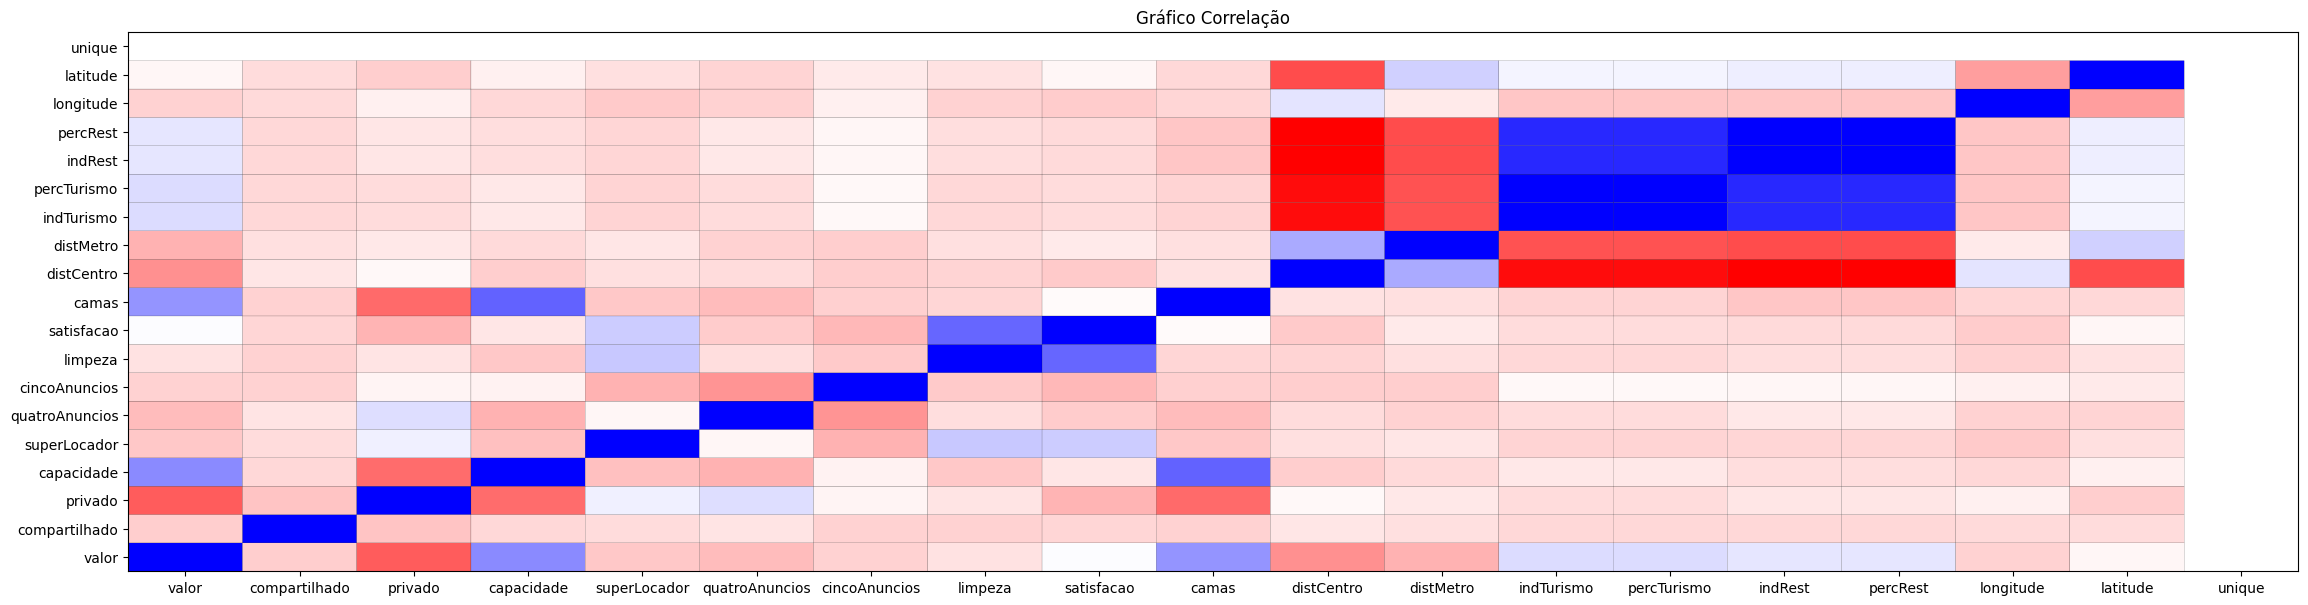

In [ ]:
# gráfico
graf_corr(df_pearson)

##### Correlação Spearman


''A correlação de Spearman avalia a relação monotônica entre duas variáveis contínuas ou ordinais. Em uma relação monotônica, as variáveis tendem a mudar juntas mas não necessariamente a uma taxa constante. O coeficiente de correlação de Spearman baseia-se nos valores classificados de cada variável, em vez de os dados brutos.

A correlação de Spearman é muito usada para avaliar relações envolvendo variáveis ordinais. Por exemplo, você poderia usar a correlação de Spearman para avaliar se a ordem na qual os funcionários executam um teste está relacionada ao número de meses de emprego.''

**inconstante**

In [ ]:
# correlação de spearman
df_spearman = df.corr(method = 'spearman', numeric_only = True)
df_spearman

,valor,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude,unique
valor,1.000000,-0.081759,-0.628126,0.610700,-0.104697,-0.208461,0.014103,-0.003461,0.174673,0.523019,-0.389795,-0.192857,0.410254,0.410254,0.399661,0.399661,-0.045361,0.083872,NaN
compartilhado,-0.081759,1.000000,-0.074968,-0.001442,0.006581,0.030710,-0.026678,-0.025714,-0.032716,-0.029950,0.015601,0.011729,-0.019356,-0.019356,-0.021717,-0.021717,0.001529,0.015852,NaN
privado,-0.628126,-0.074968,1.000000,-0.375740,0.172563,0.238326,0.083153,0.042725,-0.152758,-0.402995,0.033773,0.006703,-0.042338,-0.042338,-0.035550,-0.035550,0.067047,-0.018256,NaN
capacidade,0.610700,-0.001442,-0.375740,1.000000,-0.097934,-0.153406,0.065403,-0.103698,0.016737,0.680946,-0.030434,-0.012355,0.034101,0.034101,0.023673,0.023673,0.017338,0.060568,NaN
superLocador,-0.104697,0.006581,0.172563,-0.097934,1.000000,0.096795,-0.138505,0.350115,0.332123,-0.049715,0.017926,0.033306,-0.015949,-0.015949,-0.020154,-0.020154,-0.045169,0.007815,NaN
quatroAnuncios,-0.208461,0.030710,0.238326,-0.153406,0.096795,1.000000,-0.240799,0.018391,-0.054523,-0.101335,-0.008904,-0.033026,0.005691,0.005691,0.011765,0.011765,-0.030313,-0.013334,NaN
cincoAnuncios,0.014103,-0.026678,0.083153,0.065403,-0.138505,-0.240799,1.000000,-0.063669,-0.137656,-0.060752,-0.092969,-0.083389,0.069357,0.069357,0.075913,0.075913,0.096395,0.066569,NaN
limpeza,-0.003461,-0.025714,0.042725,-0.103698,0.350115,0.018391,-0.063669,1.000000,0.571126,-0.021610,-0.006345,0.001169,0.000817,0.000817,0.002947,0.002947,-0.038708,0.002769,NaN
satisfacao,0.174673,-0.032716,-0.152758,0.016737,0.332123,-0.054523,-0.137656,0.571126,1.000000,0.130763,0.010674,0.059751,-0.016482,-0.016482,-0.014673,-0.014673,-0.063427,0.025993,NaN
camas,0.523019,-0.029950,-0.402995,0.680946,-0.049715,-0.101335,-0.060752,-0.021610,0.130763,1.000000,0.056017,0.014049,-0.039809,-0.039809,-0.049345,-0.049345,-0.025312,-0.033120,NaN


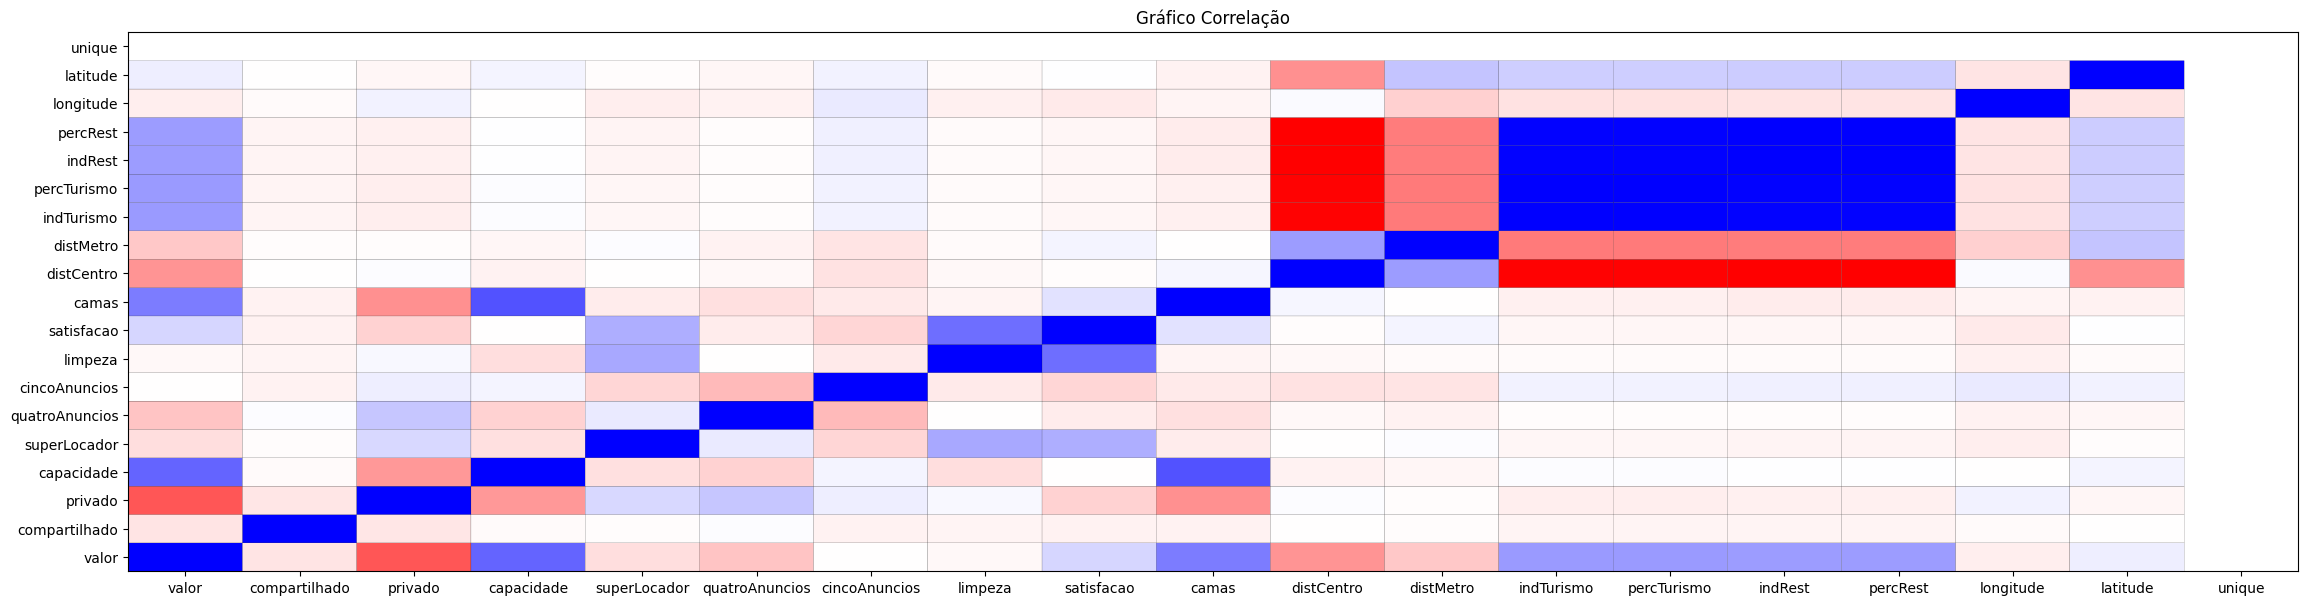

In [ ]:
# gráfico
graf_corr(df_spearman)

##### Correlação Kendall (tau)

"O coeficiente de concordância de Kendall indica o grau de associação de avaliações ordinais feitas por vários avaliadores quando avaliam as mesmas amostras. O coeficiente de Kendall normalmente é usado em análise de concordância de atributos. "

"Os coeficientes de correlação são especificados para cada avaliador para identificar a concordância de cada avaliador com o padrão conhecido; e um coeficiente geral para representar todos os avaliadores com os padrões. O coeficiente de correlação ajuda a determinar se um avaliador é consistente mas impreciso"

**impreciso**

In [ ]:
# correlação de kendall
df_kendall = df.corr(method = 'kendall', numeric_only = True)
df_kendall

,valor,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude,unique
valor,1.000000,-0.066878,-0.513800,0.493096,-0.085641,-0.170519,0.011536,-0.002992,0.123014,0.406654,-0.264824,-0.131207,0.281571,0.281571,0.272924,0.272924,-0.030476,0.054980,NaN
compartilhado,-0.066878,1.000000,-0.074968,-0.001386,0.006581,0.030710,-0.026678,-0.024769,-0.027791,-0.028507,0.012744,0.009581,-0.015811,-0.015811,-0.017740,-0.017740,0.001249,0.012951,NaN
privado,-0.513800,-0.074968,1.000000,-0.361232,0.172563,0.238326,0.083153,0.041156,-0.129762,-0.383583,0.027588,0.005476,-0.034585,-0.034585,-0.029039,-0.029039,0.054773,-0.014915,NaN
capacidade,0.493096,-0.001386,-0.361232,1.000000,-0.094152,-0.147482,0.062878,-0.095780,0.013736,0.628097,-0.024214,-0.009712,0.026859,0.026859,0.018809,0.018809,0.013345,0.047767,NaN
superLocador,-0.085641,0.006581,0.172563,-0.094152,1.000000,0.096795,-0.138505,0.337253,0.282125,-0.047320,0.014643,0.027207,-0.013028,-0.013028,-0.016463,-0.016463,-0.036900,0.006385,NaN
quatroAnuncios,-0.170519,0.030710,0.238326,-0.147482,0.096795,1.000000,-0.240799,0.017715,-0.046315,-0.096453,-0.007273,-0.026978,0.004649,0.004649,0.009610,0.009610,-0.024764,-0.010894,NaN
cincoAnuncios,0.011536,-0.026678,0.083153,0.062878,-0.138505,-0.240799,1.000000,-0.061330,-0.116933,-0.057826,-0.075944,-0.068117,0.056655,0.056655,0.062011,0.062011,0.078748,0.054387,NaN
limpeza,-0.002992,-0.024769,0.041156,-0.095780,0.337253,0.017715,-0.061330,1.000000,0.486471,-0.019744,-0.005080,0.000722,0.000477,0.000477,0.002223,0.002223,-0.030509,0.002429,NaN
satisfacao,0.123014,-0.027791,-0.129762,0.013736,0.282125,-0.046315,-0.116933,0.486471,1.000000,0.105961,0.008229,0.040714,-0.011170,-0.011170,-0.010482,-0.010482,-0.043905,0.017607,NaN
camas,0.406654,-0.028507,-0.383583,0.628097,-0.047320,-0.096453,-0.057826,-0.019744,0.105961,1.000000,0.043173,0.010690,-0.030767,-0.030767,-0.038247,-0.038247,-0.019337,-0.025162,NaN


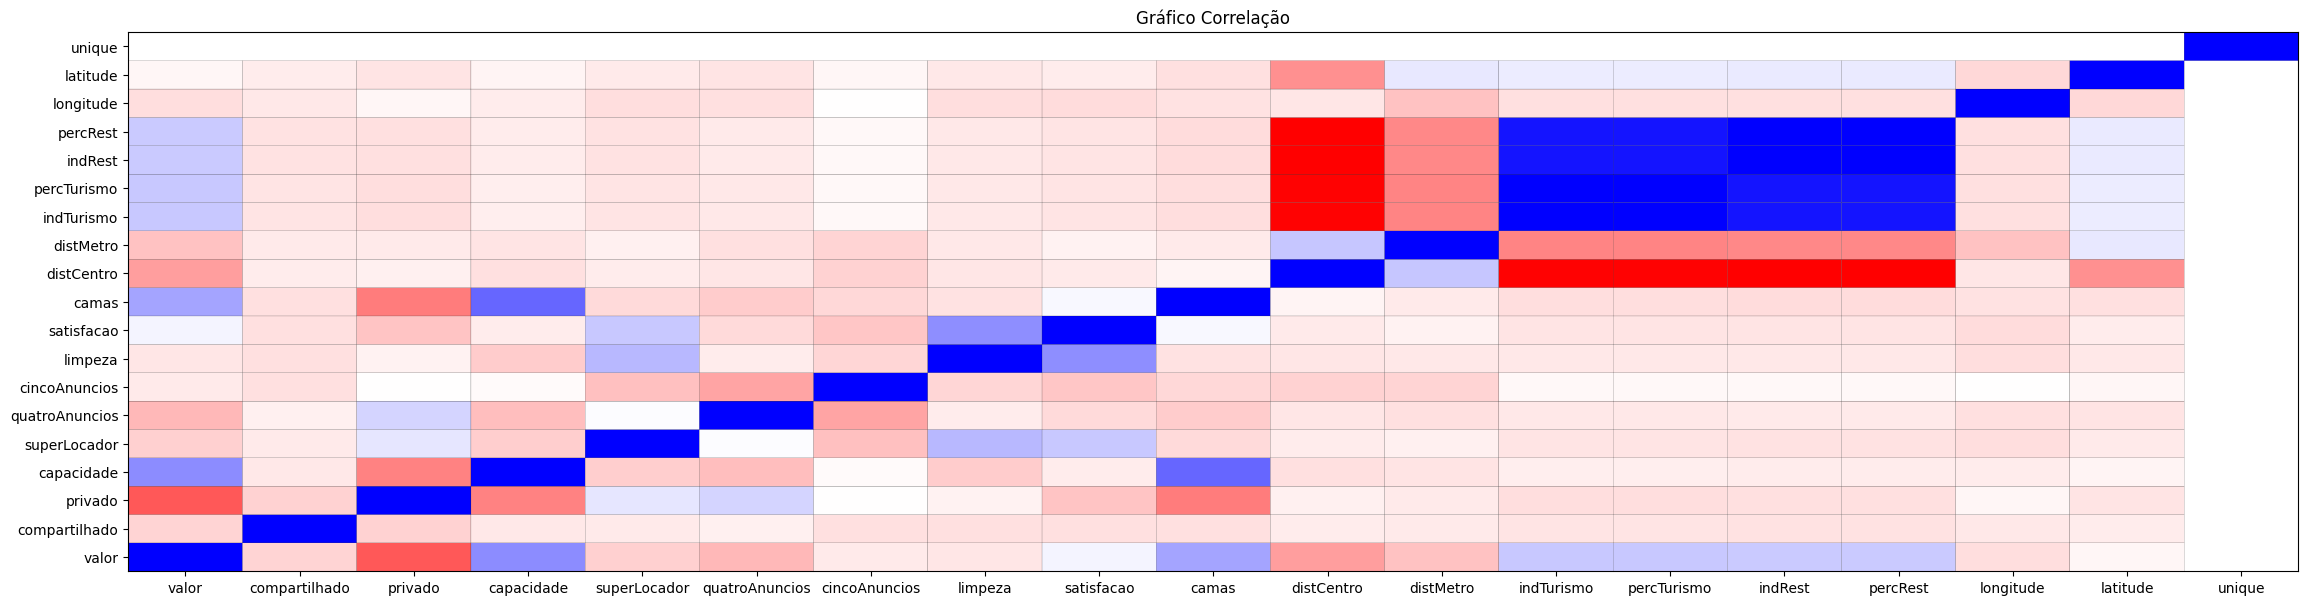

In [ ]:
# gráfico
graf_corr(df_kendall)

##### Agrupamento por Tipo de Acomodação

In [ ]:
# agrupando elementos por tipo de acomodação
df_tipo = df.groupby('tipo')

In [ ]:
# mínimo
min_tipo = df_tipo.min()
print( f' Mínimo agrupado por tipo de quarto:\n')
display(min_tipo)

# máximo
max_tipo = df_tipo.max()
print( f'\nMáximo agrupado por tipo de quarto:\n')
display(max_tipo)

# média
media_tipo = df_tipo.mean()
print( f'\nMédia agrupada por tipo de quarto:\n')
display(media_tipo)

# soma
soma_tipo = df_tipo.sum()
print( f'\nSomatório agrupado por tipo de quarto:\n')
display(soma_tipo)

 Mínimo agrupado por tipo de quarto:



,valor,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude,unique
tipo,,,,,,,,,,,,,,,,,,,
CASA_APTO,128.887118,False,False,2.0,False,0,0,6.0,60.0,1,0.015059,0.036530,41.345815,2.189288,51.387308,3.580742,4.77975,52.29306,False
ESTUDIO,209.031472,False,False,2.0,False,0,0,5.0,78.0,0,0.099654,0.038355,52.563076,2.783250,65.586827,4.570184,4.82700,52.33792,False
QUARTO,143.650552,False,False,2.0,False,0,0,4.0,20.0,1,0.167313,0.048463,40.931415,2.167346,50.877318,3.545205,4.77550,52.29110,False



Máximo agrupado por tipo de quarto:



,valor,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude,unique
tipo,,,,,,,,,,,,,,,,,,,
CASA_APTO,7782.907225,False,False,6.0,True,1,1,10.0,100.0,5,11.037736,4.411915,1861.001507,98.541266,1147.147422,79.934883,5.00490,52.42258,False
ESTUDIO,1567.033019,False,True,4.0,True,1,1,10.0,100.0,0,8.396194,3.832716,810.500427,42.916536,1022.004125,71.214718,5.00769,52.41182,False
QUARTO,1714.433014,True,True,5.0,True,1,1,10.0,100.0,5,11.187100,4.143227,1888.550428,100.000000,1435.102401,100.000000,5.01077,52.42348,False



Média agrupada por tipo de quarto:



,valor,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude,unique
tipo,,,,,,,,,,,,,,,,,,,
CASA_APTO,745.806841,0.000000,0.000000,3.239686,0.220039,0.190570,0.090373,9.442043,95.298625,1.666012,2.618489,1.043894,269.399839,14.264900,331.598636,23.106270,4.887859,52.365523,0.0
ESTUDIO,420.076011,0.000000,0.650602,2.301205,0.204819,0.277108,0.253012,9.313253,92.337349,0.000000,2.107404,0.971302,335.964448,17.789541,445.634203,31.052432,4.894030,52.369048,0.0
QUARTO,365.314383,0.011742,0.988258,2.426614,0.379648,0.430528,0.117417,9.504892,93.759295,1.109589,3.183137,1.153993,262.063309,13.876426,334.537347,23.311044,4.893977,52.363515,0.0



Somatório agrupado por tipo de quarto:



,valor,compartilhado,privado,capacidade,superLocador,quatroAnuncios,cincoAnuncios,limpeza,satisfacao,camas,distCentro,distMetro,indTurismo,percTurismo,indRest,percRest,longitude,latitude,unique
tipo,,,,,,,,,,,,,,,,,,,
CASA_APTO,379615.682047,0,0,1649.0,112,97,46,4806.0,48507.0,848,1332.810705,531.342104,137124.518029,7260.834342,168783.705630,11761.091441,2487.92030,26654.05103,0
ESTUDIO,34866.308907,0,54,191.0,17,23,21,773.0,7664.0,0,174.914494,80.618087,27885.049225,1476.531885,36987.638837,2577.351889,406.20450,4346.63102,0
QUARTO,186675.649708,6,505,1240.0,194,220,60,4857.0,47911.0,567,1626.583089,589.690642,133914.350981,7090.853864,170948.584454,11911.943312,2500.82201,26757.75599,0


In [ ]:
# contagem por tipo de acomodação
estudio = df[df['tipo'] == 'ESTUDIO'].unique.count()
quarto = df[df['tipo'] == 'QUARTO'].unique.count()
casa_apto = df[df['tipo'] == 'CASA_APTO'].unique.count()

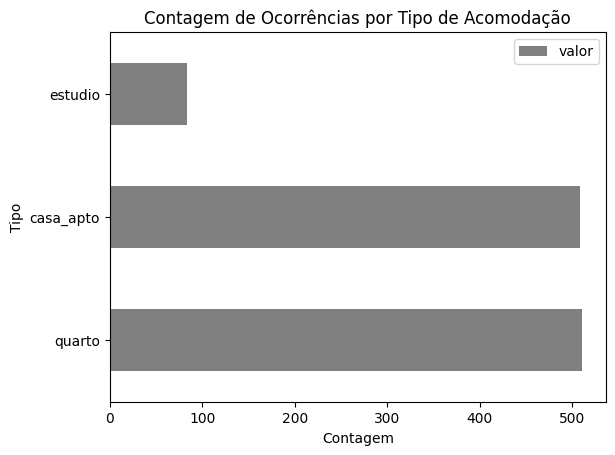

In [ ]:
# gráfico de barras com contagem dos elementos por tipo de acomodação
dict_tipo = {'tipo': ['quarto', 'casa_apto','estudio'], 'valor': [quarto, casa_apto, estudio]}
df_dt = pd.DataFrame(dict_tipo, index = dict_tipo['tipo'])
df_dt.plot.barh(color={"valor" : "gray"})

plt.xlabel('Contagem')
plt.ylabel('Tipo')
plt.title('Contagem de Ocorrências por Tipo de Acomodação')

plt.show()

In [ ]:
# contagem Super Host por tipo de acomodação
super_estudio = soma_tipo.superLocador['ESTUDIO']
super_casa_apto = soma_tipo.superLocador['CASA_APTO']
super_quarto = soma_tipo.superLocador['QUARTO']

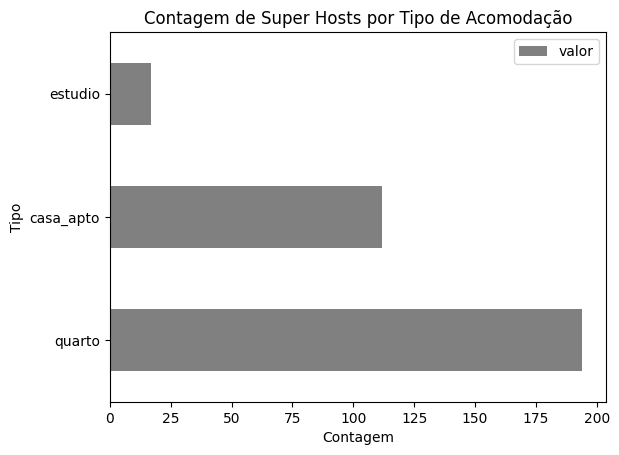

In [ ]:
# gráfico de barras com contagem dos super hosts por tipo de acomodação
dict_tipo = {'tipo': ['quarto', 'casa_apto','estudio'], 'valor': [super_quarto, super_casa_apto, super_estudio]}
df_dt = pd.DataFrame(dict_tipo, index = dict_tipo['tipo'])
df_dt.plot.barh(color={"valor" : "grey"})

plt.xlabel('Contagem')
plt.ylabel('Tipo')
plt.title('Contagem de Super Hosts por Tipo de Acomodação')

plt.show()

### Resumo

In [ ]:
print( f'O dataframe possui {falsos} linhas únicas e {verdades} duplicadas.')
print( f'O dataframe possui {nulos} valores nulos.')
print( f'De um total de {estudio+quarto+casa_apto} acomodações, os dados estão distribuídos entre {estudio} estúdios, {quarto} quartos, compartilhados e privados, e {casa_apto} casas ou apartamentos inteiros.')
print( f'Destes, tem-se um total de {super_estudio+super_quarto+super_casa_apto} acomodações de super hosts, distribuídos entre {super_estudio} estúdios, {super_quarto} quartos, compartilhados e privados, e {super_casa_apto} casas ou apartamentos inteiros.')


O dataframe possui 1103 linhas únicas e 0 duplicadas.
O dataframe possui 0 valores nulos.
De um total de 1103 acomodações, os dados estão distribuídos entre 83 estúdios, 511 quartos, compartilhados e privados, e 509 casas ou apartamentos inteiros.
Destes, tem-se um total de 323 acomodações de super hosts, distribuídos entre 17 estúdios, 194 quartos, compartilhados e privados, e 112 casas ou apartamentos inteiros.


### Insights

##### *Há relação entre satisfação e limpeza do local quando o locador é SuperHost, considerando os valores abaixo da mediana?*

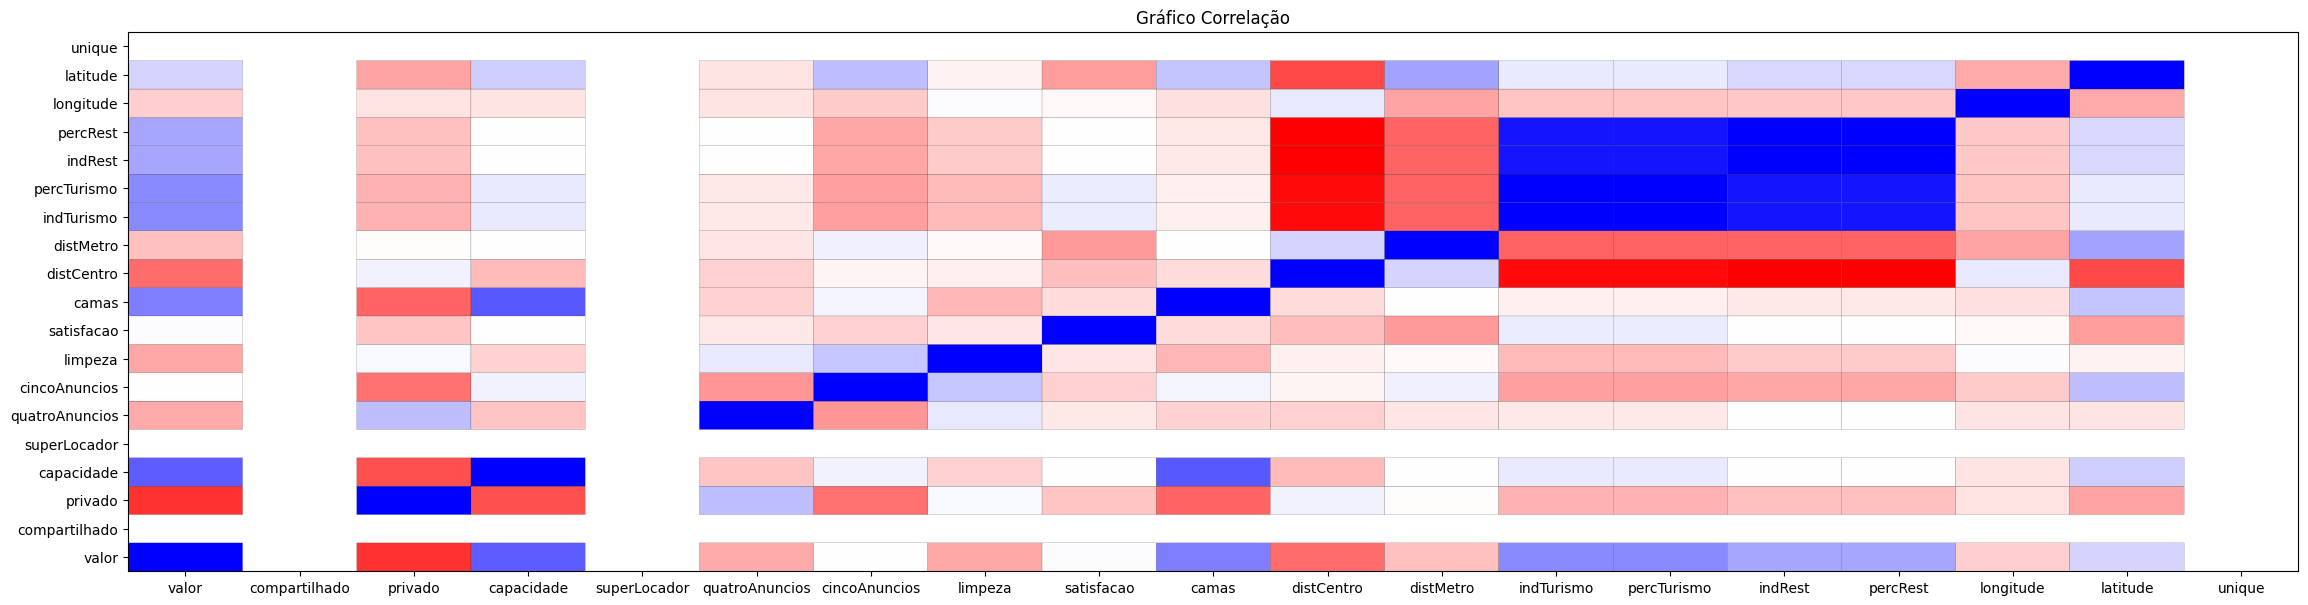

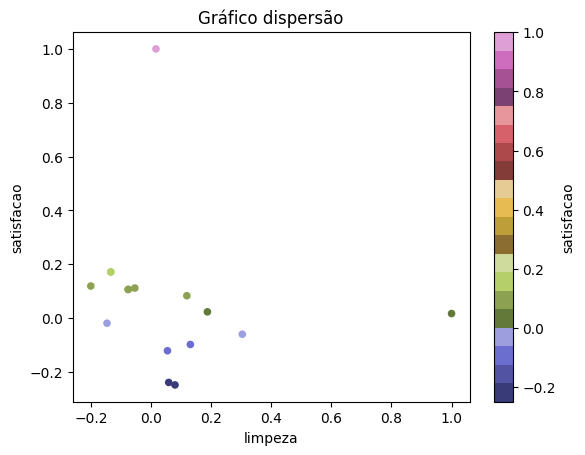

In [ ]:
# seleção dos dados onde o percentil de satisfação é menor que 50%
df_atributos1 = df[df.satisfacao < np.percentile(df.satisfacao, 50)]

# subseleção dos dados onde o locador é SuperHost
df_atributos1 = df_atributos1[df_atributos1.superLocador == True]

# aplicando correlação de pearson
df_atributos1 = df_atributos1.corr()

# gráfico correlação
graf_corr(df_atributos1)
print('\n')

# gráfico dispersão
graf_scatter(df_atributos1, 'limpeza', 'satisfacao', 'satisfacao')

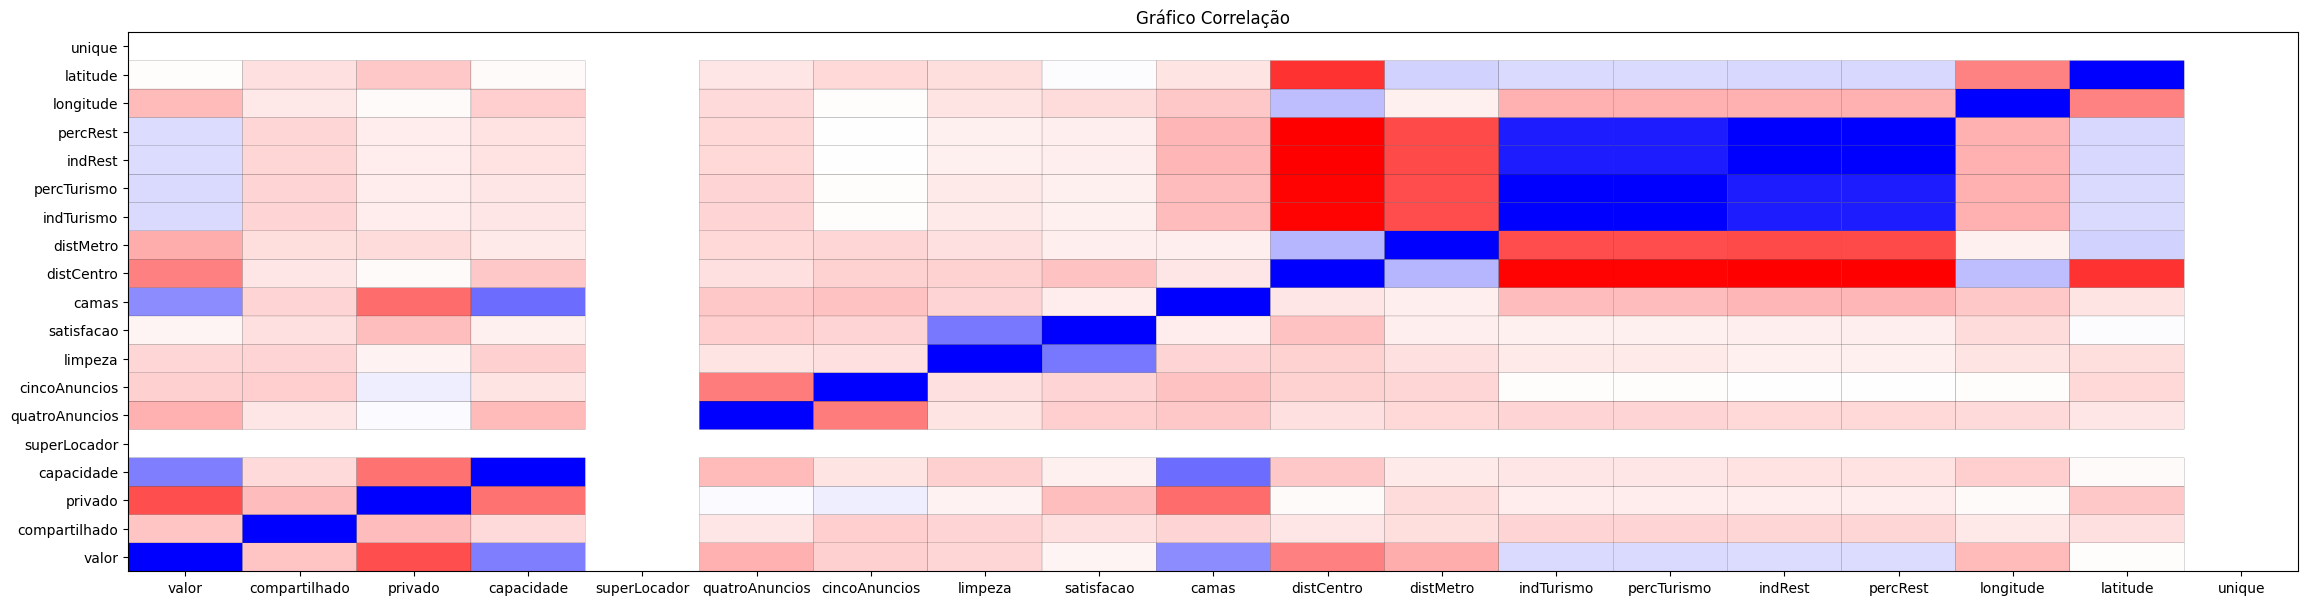

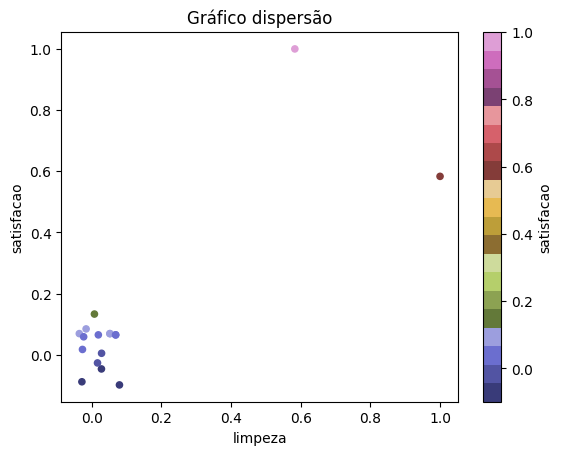

In [ ]:
# seleção dos dados onde percentil de satisfação é menor do que 50%
df_atributos2 = df[df.satisfacao < np.percentile(df.satisfacao, 50)]

# subseleção dos dados onde o locador NÃO É SuperHost
df_atributos2 = df_atributos2 [df_atributos2.superLocador == False]

# aplicando correlação de pearson
df_atributos2 = df_atributos2.corr()

# gráfico correlação
graf_corr(df_atributos2)
print('\n')

# gráfico dispersão
graf_scatter(df_atributos2, 'limpeza', 'satisfacao', 'satisfacao')

##### *Há relação entre satisfação e limpeza do local quando a distância do Centro se encontra no 1º quartil e o número de camas é maior ou menor-igual a 1?*

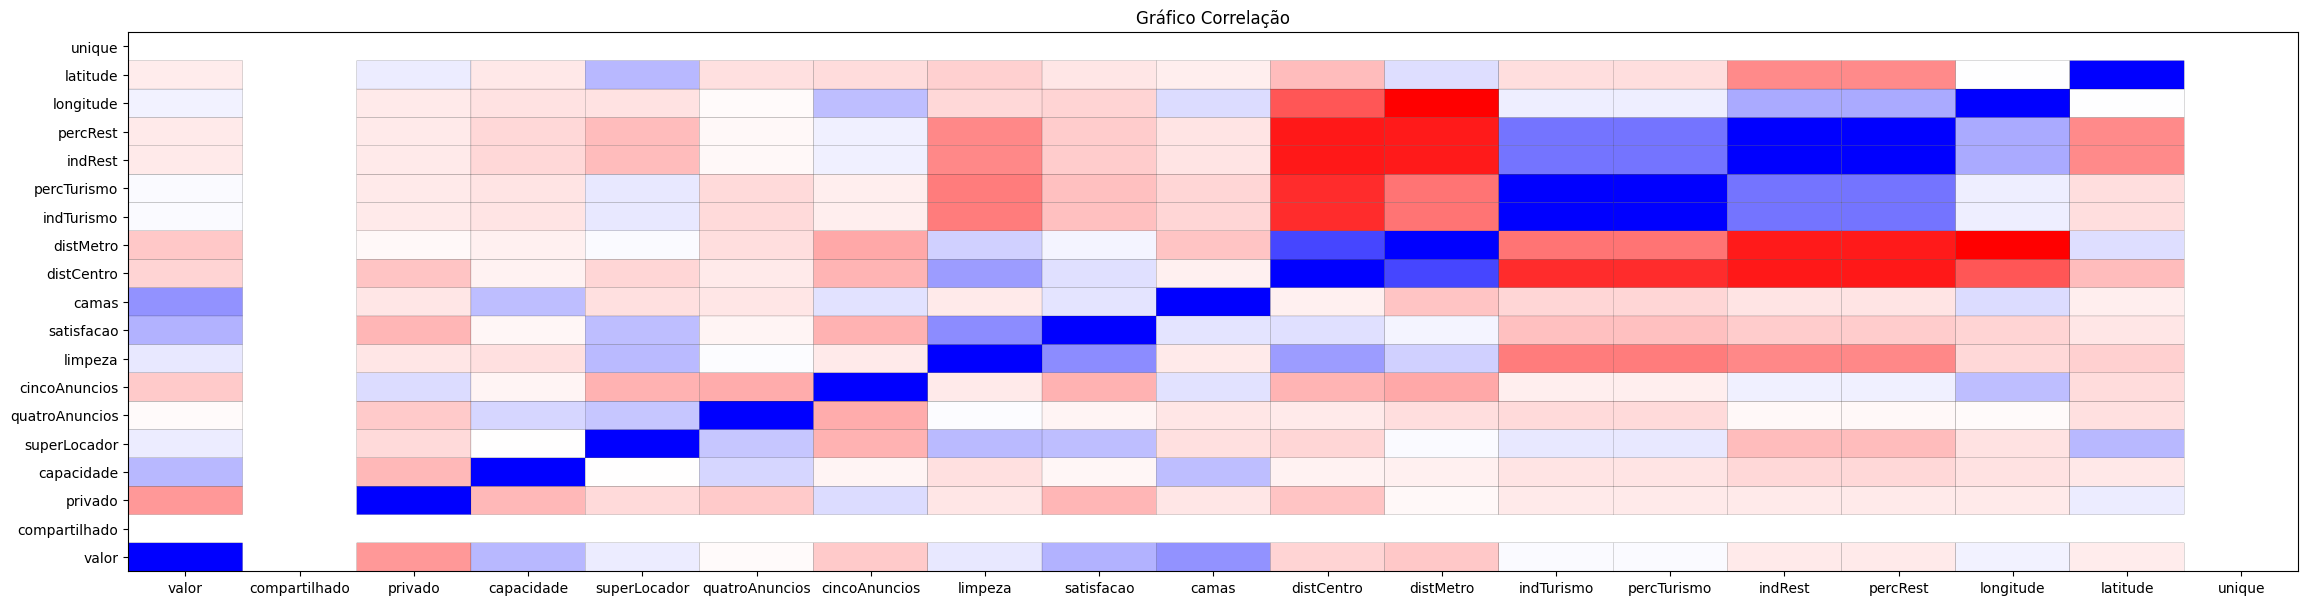

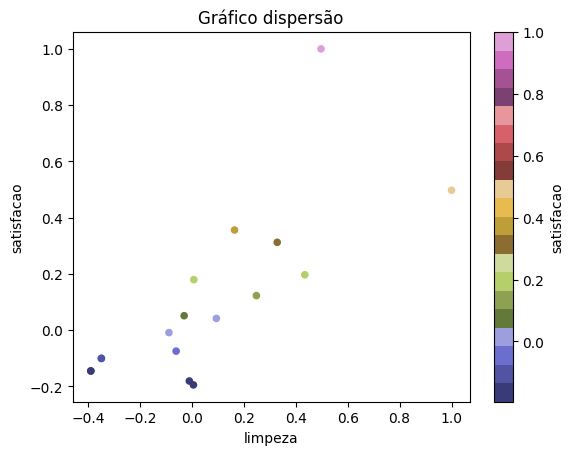

In [ ]:
# seleção dos dados onde distancia do centro esta no primeiro quartil
df_atributos3 = df[df.distCentro < np.percentile(df.distCentro, 25)]

# subseleção dos dados onde a acomodação é maior que 1
df_atributos3 = df_atributos3 [df_atributos3.camas > 1]

# aplicando correlação de pearson
df_atributos3 = df_atributos3.corr()

# gráfico correlação
graf_corr(df_atributos3)
print('\n')

# gráfico dispersão
graf_scatter(df_atributos3, 'limpeza', 'satisfacao', 'satisfacao')

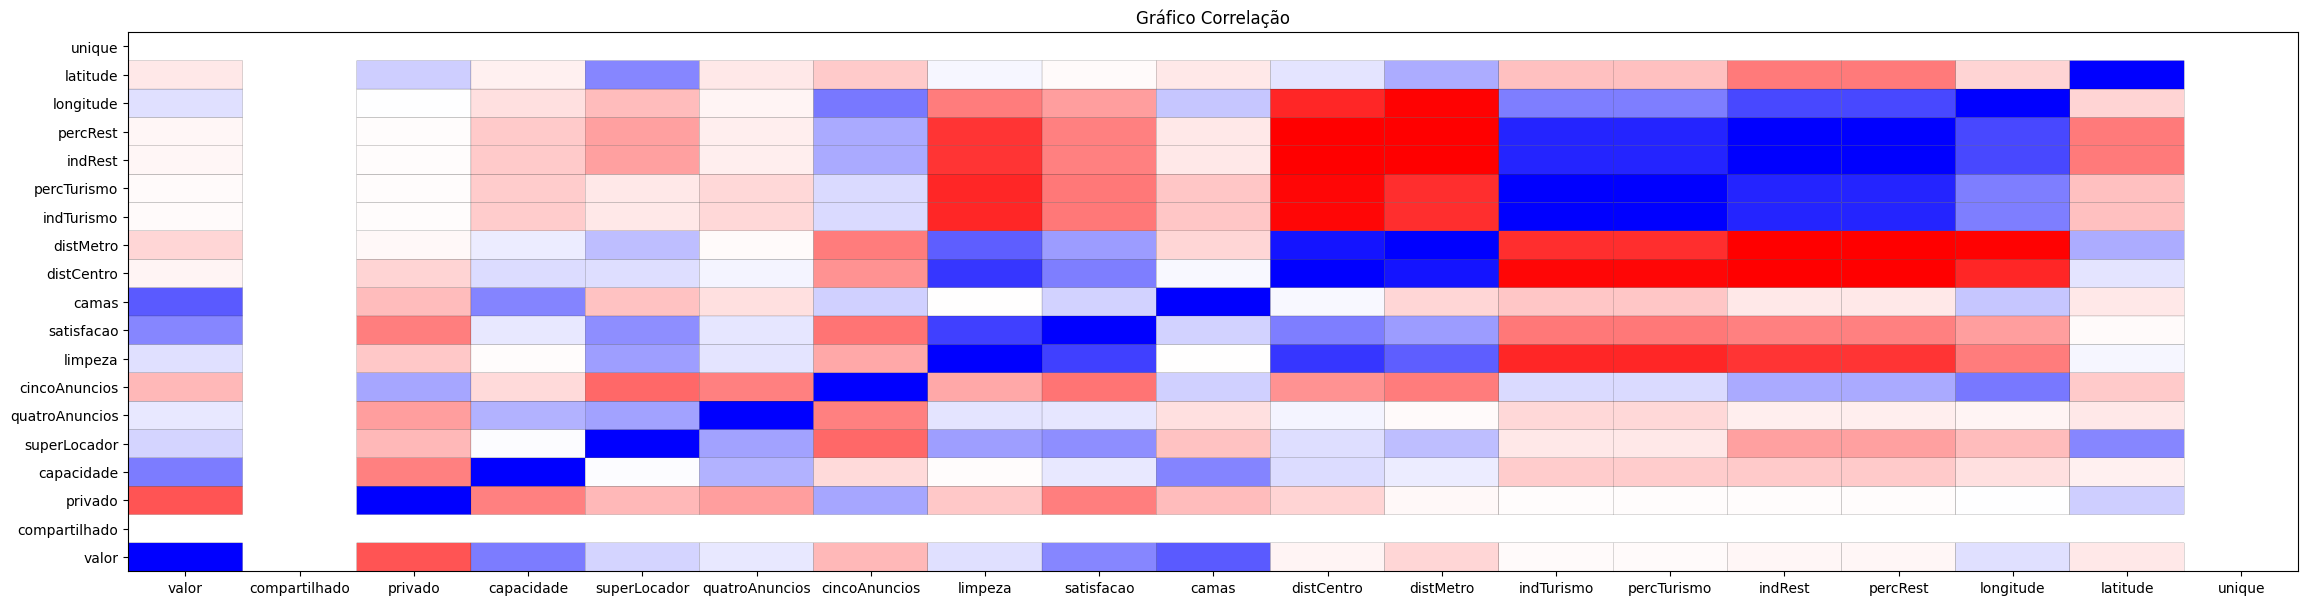

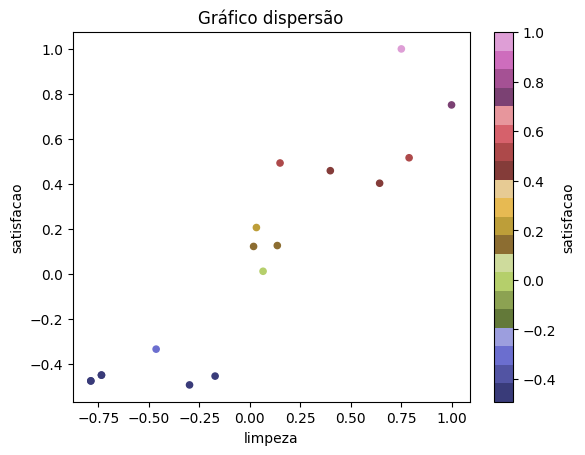

In [ ]:
# seleção dos dados onde distancia do centro esta no primeiro quartil
df_atributos4 = df_atributos3

# subseleção dos dados onde a acomodação é menor igual a 1
df_atributos4 = df_atributos4 [df_atributos4.camas <= 1]

# aplicando correlação de pearson
df_atributos4 = df_atributos4.corr()

# gráfico correlação
graf_corr(df_atributos4)
print('\n')

# gráfico dispersão
graf_scatter(df_atributos4, 'limpeza', 'satisfacao', 'satisfacao')

##### *Há correlação entre limpeza e distância do centro da cidade que tenha reflexo na satisfação?*

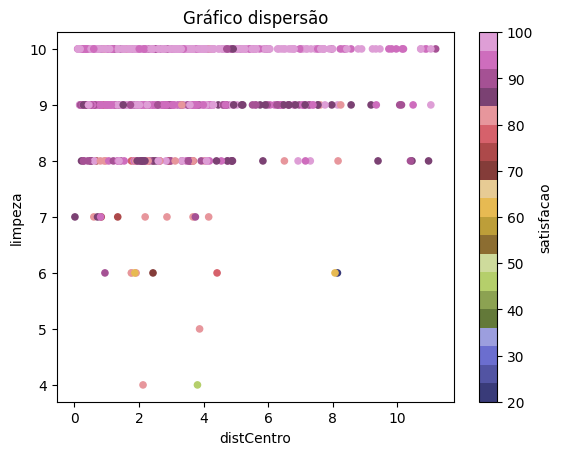

In [ ]:
# gráfico de dispersão
graf_scatter(df, 'distCentro', 'limpeza', 'satisfacao')

In [ ]:
backup02 = df.copy()

### Preparando Dataframe para análise

##### Selecionado Atributos para o Dataframe

In [ ]:
df_analise = df.drop(columns = ['compartilhado', 'privado', 'capacidade', 'quatroAnuncios', 'cincoAnuncios', 'distMetro', 'indTurismo', 'percTurismo', 'indRest', 'percRest', 'longitude', 'latitude', 'unique'])
df_analise

,valor,tipo,superLocador,limpeza,satisfacao,camas,distCentro
0,194.033698,QUARTO,False,10.0,93.0,1,5.022964
1,344.245776,QUARTO,False,8.0,85.0,1,0.488389
2,264.101422,QUARTO,False,9.0,87.0,1,5.748312
3,433.529398,QUARTO,False,9.0,90.0,2,0.384862
4,485.552926,QUARTO,True,10.0,98.0,1,0.544738
...,...,...,...,...,...,...,...
1098,2486.115342,CASA_APTO,False,10.0,100.0,1,2.375833
1099,233.637194,QUARTO,False,10.0,90.0,1,4.719736
1100,317.062311,QUARTO,False,10.0,92.0,1,0.598355
1101,1812.855904,CASA_APTO,False,8.0,84.0,5,1.943020


##### Verificando informações do Dataframe

In [ ]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         1103 non-null   float64
 1   tipo          1103 non-null   object 
 2   superLocador  1103 non-null   bool   
 3   limpeza       1103 non-null   float64
 4   satisfacao    1103 non-null   float64
 5   camas         1103 non-null   int64  
 6   distCentro    1103 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 52.9+ KB


##### Ajustando valores das colunas selecionadas

In [ ]:
# arredondando valores para 2 casas decimais
df_analise.valor = np.round(df_analise.valor, 2)
df_analise.distCentro = np.round(df_analise.distCentro, 2)

# alterando tipo de dados
df_analise.limpeza = df_analise.limpeza.astype(int)
df_analise.satisfacao = df_analise.satisfacao.astype(int)

# exibindo tipos de dados
df_analise.dtypes

valor           float64
tipo             object
superLocador       bool
limpeza           int64
satisfacao        int64
camas             int64
distCentro      float64
dtype: object

##### Ordenando Dataframe

In [ ]:
# ordenação do dataframe conforme satisfacao e valor, respectivamente
df_analise = df_analise.sort_values(by = ['satisfacao', 'valor'])
df_analise.head(20)

,valor,tipo,superLocador,limpeza,satisfacao,camas,distCentro
901,233.64,QUARTO,False,6,20,1,8.15
627,528.44,QUARTO,False,4,47,1,3.81
907,209.03,QUARTO,False,6,60,1,8.07
857,378.69,QUARTO,False,10,60,1,0.56
853,566.63,CASA_APTO,False,6,60,2,1.87
626,651.23,CASA_APTO,False,6,65,2,1.77
544,276.29,QUARTO,False,6,70,1,2.43
419,657.32,QUARTO,False,9,73,2,3.08
375,371.19,CASA_APTO,False,7,74,1,1.34
485,288.71,QUARTO,False,8,75,1,0.68


#### Validação de Schema

In [ ]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({'valor': pa.Column(pa.Float),
                            'tipo': pa.Column(pa.String),
                            'superLocador': pa.Column(pa.Bool),
                            'limpeza': pa.Column(pa.Int),
                            'satisfacao': pa.Column(pa.Int),
                            'camas': pa.Column(pa.Int),
                            'distCentro': pa.Column(pa.Float)
                            })

In [ ]:
# Validar o DataFrame
schema.validate(df_analise)

,valor,tipo,superLocador,limpeza,satisfacao,camas,distCentro
901,233.64,QUARTO,False,6,20,1,8.15
627,528.44,QUARTO,False,4,47,1,3.81
907,209.03,QUARTO,False,6,60,1,8.07
857,378.69,QUARTO,False,10,60,1,0.56
853,566.63,CASA_APTO,False,6,60,2,1.87
...,...,...,...,...,...,...,...
271,2458.23,CASA_APTO,False,10,100,3,1.16
1098,2486.12,CASA_APTO,False,10,100,1,2.38
253,2500.88,CASA_APTO,False,9,100,1,1.43
7,2771.31,CASA_APTO,True,10,100,3,1.69


In [ ]:
backup03 = df_analise.copy()

### Análises

#### Filtros

##### Filtro Tipo Acomodação

In [ ]:
filtro_quarto = df_analise.tipo == 'QUARTO'
filtro_estudio = df_analise.tipo == 'ESTUDIO'
filtro_inteiro = df_analise.tipo == 'CASA_APTO'

##### Filtro Super Host

In [ ]:
filtro_host = df_analise.superLocador == True

##### Filtro Distância

In [ ]:
filtro_perto = df_analise.distCentro < np.percentile(df_analise.distCentro, 25)

##### Filtro Satisfacao

In [ ]:
filtro_critico = df_analise.satisfacao < np.percentile(df_analise.satisfacao, 25)
filtro_alerta = np.logical_and (df_analise.satisfacao < np.percentile(df_analise.satisfacao, 50), df_analise.satisfacao > np.percentile(df_analise.satisfacao, 25))

##### Filtro Limpeza

In [ ]:
filtro_limpa = df_analise.limpeza < np.percentile(df_analise.limpeza, 95)

##### Filtro Valor

In [ ]:
filtro_baixo = df_analise.valor < np.percentile(df_analise.valor, 25)

##### Queries

Agrupamento por tipo de acomodação e filtro de satisfação e limpeza

In [ ]:
dfan01 = df_analise.loc[filtro_critico & filtro_limpa]

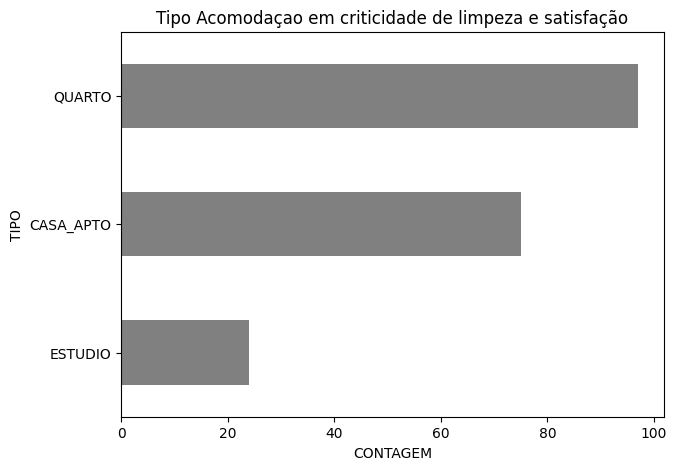

In [ ]:
vis01 = dfan01.groupby(['tipo']).size().sort_values()

graf_bar(vis01, 'CONTAGEM', 'TIPO', 'Tipo Acomodaçao em criticidade de limpeza e satisfação')

Agrupamento por Super Host e filtro de satisfação e limpeza

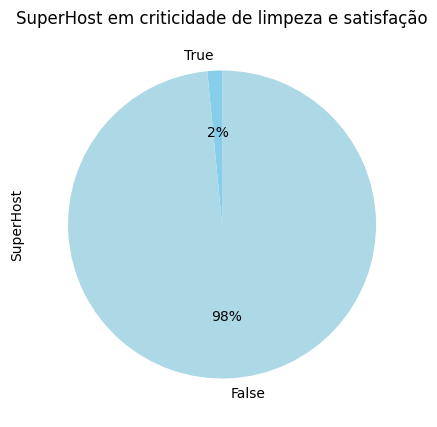

In [ ]:
vis02 = dfan01.groupby(['superLocador']).size().sort_values()

graf_setores(vis02, 'SuperHost', 'SuperHost em criticidade de limpeza e satisfação')

Agrupamento por tipo de acomodação e filtro de satisfação e distância do centro

In [ ]:
dfan02 = df_analise.loc[filtro_critico & filtro_perto]

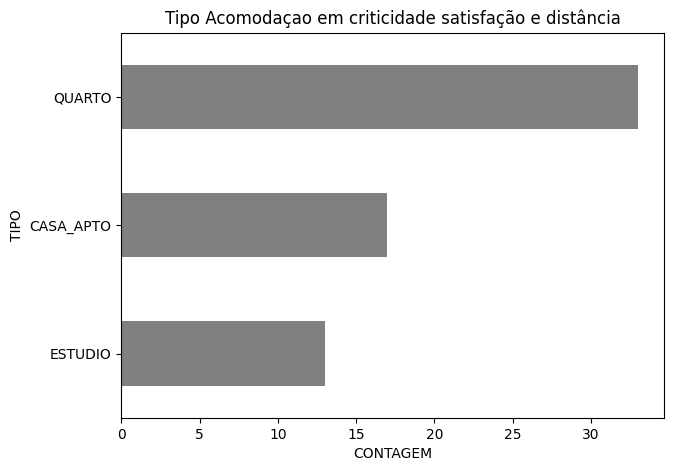

In [ ]:
vis03 = dfan02.groupby(['tipo']).size().sort_values()

graf_bar(vis03, 'CONTAGEM', 'TIPO', 'Tipo Acomodaçao em criticidade satisfação e distância')

Agrupamento por satisfação e filtro de satisfação e valor

In [ ]:
dfan03 = df_analise.loc[filtro_limpa & filtro_baixo]

In [ ]:
vis04 = dfan03.groupby(['satisfacao']).size().sort_values()

graf_bar(vis04, 'CONTAGEM', 'SATISFAÇÃO', 'Satisfação considerando criticidade de limpeza e valor')

NameError: ignored

<Axes: >

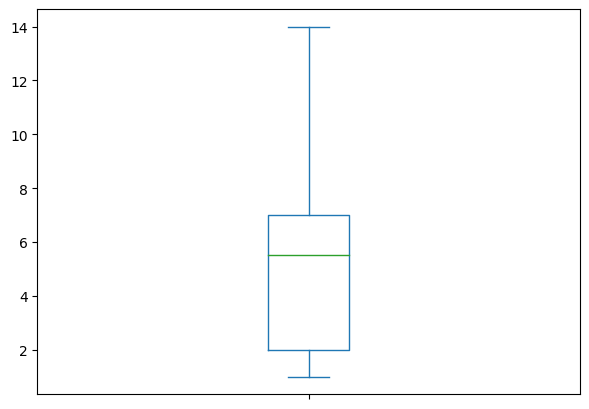

In [ ]:
vis05 = dfan03.groupby(['satisfacao']).size().sort_values()

vis05.plot.box(column="Satisfação", figsize=(7, 5))

## **Carregamento**

In [ ]:
# Carregametno GCP
df_analise.to_csv('gs://strategy-analysis/csv/dados_tratados/entrega_projeto_03_airbnb.csv', index=False)

# **CONCLUSÃO**